In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe= pd.read_csv("rows.csv", low_memory=False)

In [3]:
dataframe.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


In [4]:
dataframe.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
df = dataframe[["Product","Consumer complaint narrative"]]

In [6]:
df

,Product,Consumer complaint narrative
0,Checking or savings account,NaN
1,Checking or savings account,NaN
2,Debt collection,NaN
3,"Credit reporting, credit repair services, or o...",NaN
4,Checking or savings account,NaN
...,...,...
1282350,Credit card,NaN
1282351,Mortgage,NaN
1282352,Credit card,NaN
1282353,Mortgage,NaN


In [7]:
df.columns = ['Product','Consumer Complaint']

In [8]:
df = df[df['Consumer Complaint'].isna()!=True]

In [9]:
df['Product'].value_counts().index

Index(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Mortgage', 'Credit reporting', 'Student loan',
       'Credit card or prepaid card', 'Credit card', 'Bank account or service',
       'Checking or savings account', 'Consumer Loan', 'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service',
       'Payday loan, title loan, or personal loan', 'Payday loan',
       'Money transfers', 'Prepaid card', 'Other financial service',
       'Virtual currency'],
      dtype='object')

In [10]:
df = df.replace({"Product":
  {
    'Credit reporting, credit repair services, or other personal consumer reports' : 'Repair or Credit reporting',
    'Credit card':'Credit card or prepaid card', "Prepaid card":'Credit card or prepaid card',
    'Money transfer':'Money transfer, virtual currency, or money service',
    'Virtual currency':"Money transfer, virtual currency, or money service",
    'Payday loan':'Payday loan, title loan, or personal loan',
    "Credit reporting":'Repair or Credit reporting'
  }}
)

In [11]:
df['Product'].value_counts().index

Index(['Repair or Credit reporting', 'Debt collection', 'Mortgage',
       'Credit card or prepaid card', 'Student loan',
       'Bank account or service', 'Checking or savings account',
       'Consumer Loan', 'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service', 'Money transfers',
       'Other financial service'],
      dtype='object')

In [12]:
df1 = df.sample(10000, random_state=1).copy()

In [13]:
df1['cat_id'] = df1['Product'].factorize()[0]

In [14]:
df1['cat_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [15]:
cat_id = df1[['Product','cat_id']].drop_duplicates()

In [38]:
id_2_cat = dict(cat_id[['cat_id','Product']].values)

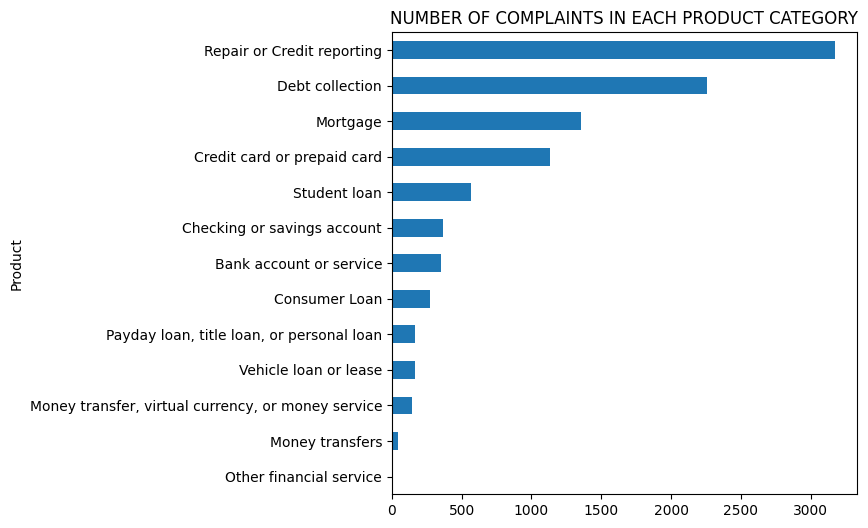

In [17]:
df1.groupby('Product')['Consumer Complaint'].count().sort_values().plot(kind="barh",
                                                                        figsize=(6,6),
                                                                        title="NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY")
plt.show()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, # Scale the term frequency on a logarithmic scale
                       #stop_words='english', #removes the stopwords of mentioned language,
                       min_df=5, #removes those words from the vocabulary which has appeared less than ‘min_df’ number of files,
                       ngram_range=(1,2) #Unigram and bigram both will be considered
                       # max_df: It removes those words from the vocabulary which have appeared more than ‘maxdf’
                       )
                       

In [20]:
feature = tfidf.fit_transform(df1['Consumer Complaint']).toarray()
labels = df1.cat_id

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature,labels,test_size=0.25,random_state=42)

In [23]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report
# Classification report
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df1['Product'].unique()))

c:\Users\atifa\anaconda3\envs\venv3.7\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                    precision    recall  f1-score   support

                        Repair or Credit reporting       0.82      0.86      0.84       785
                                   Debt collection       0.77      0.82      0.79       559
                                     Consumer Loan       0.61      0.26      0.36        74
                       Credit card or prepaid card       0.73      0.84      0.78       283
                                          Mortgage       0.85      0.93      0.89       344
                             Vehicle loan or lease       0.23      0.15      0.18        34
                                      Student loan       0.85      0.81      0.83       136
         Payday loan, title loan, or personal loan       0.62      0.20      0.30        40
                       Checking or savings account       0.47      0.41      0.44        95
                           Bank account or service       0.41      0.27      0.

c:\Users\atifa\anaconda3\envs\venv3.7\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\atifa\anaconda3\envs\venv3.7\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As you observe classes having more support ( data rows) are having better f1-score. this is happening because those classes are trained on more data. To fix this issue we should balance the data, as we have discussed already.

classes like Mortgage, Student loan, Credit reporting, repair, or other can be classified with more precision.

Plotting Confusion Matrix

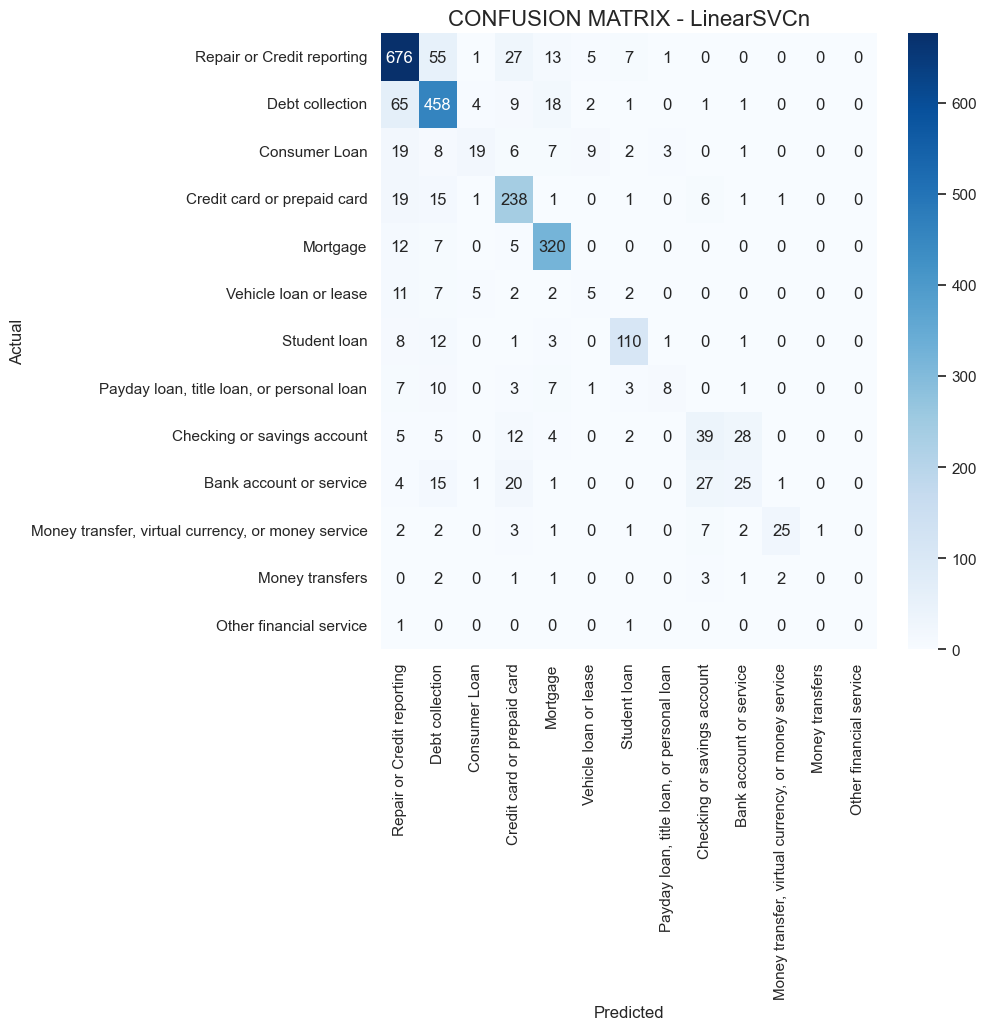

In [26]:
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=cat_id.Product.values, 
            yticklabels=cat_id.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);


It is clearly observable that Credit card reporting and data collection classes have more precision than others do.

In [31]:
complain = """I have been enrolled back in 2019 to Indian University. Few days ago , i have been harassed by 
Navient. I have already faxed the paperwork providing them with everything they wanted. And still getting 
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late for the payment. At this point, 
Navient needs take their act together to avoid me taking further steps"""

We can’t pass text directly to the trained model for prediction we need to use our fitted vectorizer for feature extraction and then only we will pass our features for prediction.

In [34]:
complaint_id = (model.predict(tfidf.transform([complain])))

In [41]:
print("complain", id_2_cat[complaint_id[0]])
# id_2_cat is dictionary where stored index as key and complain as value

complain Student loan
